In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tslearn.datasets import CachedDatasets, UCR_UEA_datasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.metrics import cdist_dtw

In [25]:
# データセット可視化メソッド
def plot_data(X_train, y_train, name):
    plt.figure(figsize=(12,5))

    # true
    # plt.subplot(1, 2, 1)
    label = np.unique(y_train)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_train == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}', color=colors[class_label - 1], alpha=0.3)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{name}')

    plt.tight_layout()
    plt.show()

# クラスタリング結果可視化メソッド
def plot_result(X_train, y_train, y_pred, name):
    plt.figure(figsize=(12,5))

    # true
    plt.subplot(1, 2, 1)
    label = np.unique(y_train)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_train == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}', color=colors[class_label - 1], alpha=1)

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f'{name} True')

    # pred
    plt.subplot(1,2,2)

    label = np.unique(y_pred)
    # カラーマップを定義
    cmap = plt.get_cmap('tab10')  # タブルランカラーマップを使用
    colors = [cmap(i) for i in range(len(label))]

    for class_label in label:
        class_data = X_train[y_pred == class_label][:,:,0].T
        plt.plot(class_data, label=f'_Class {class_label}', color=colors[class_label - 1], alpha=0.4)
        plt.plot([], label=f'Class {class_label}',
                color=colors[class_label - 1])

    plt.legend()
    # plt.text(0.05,0.95,'pred', transform=plt.gca().transAxes)
    plt.xlabel('Time')
    plt.title(f'{name} Pred')
    plt.tight_layout()
    plt.show()

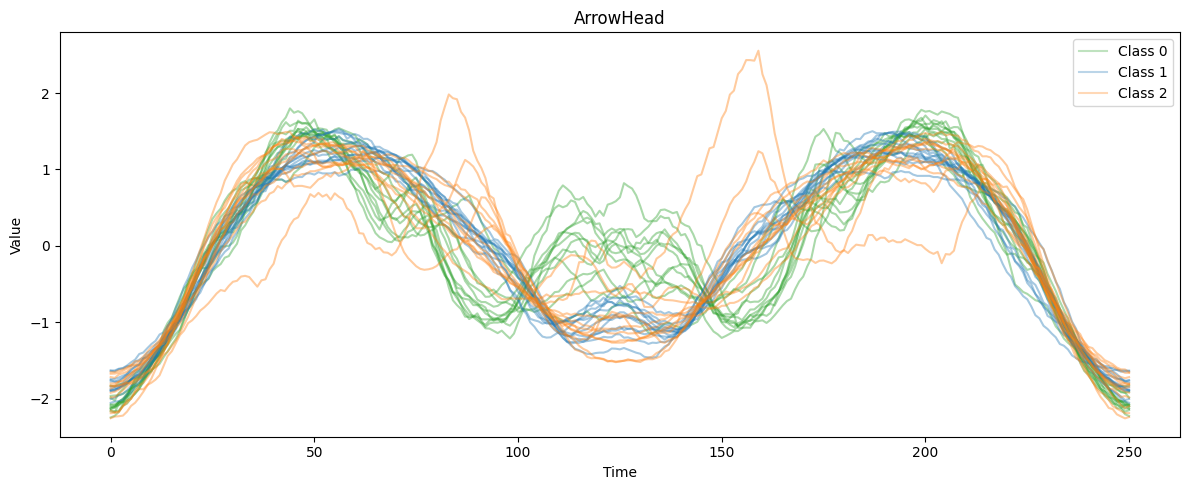

In [51]:
# データセットの読み込み（ここではUCR/UEAデータセットを使用）
data_name = 'ArrowHead'
X_train, y_train, X_test, y_test = UCR_UEA_datasets().load_dataset(data_name)

plot_data(X_train, y_train, data_name)

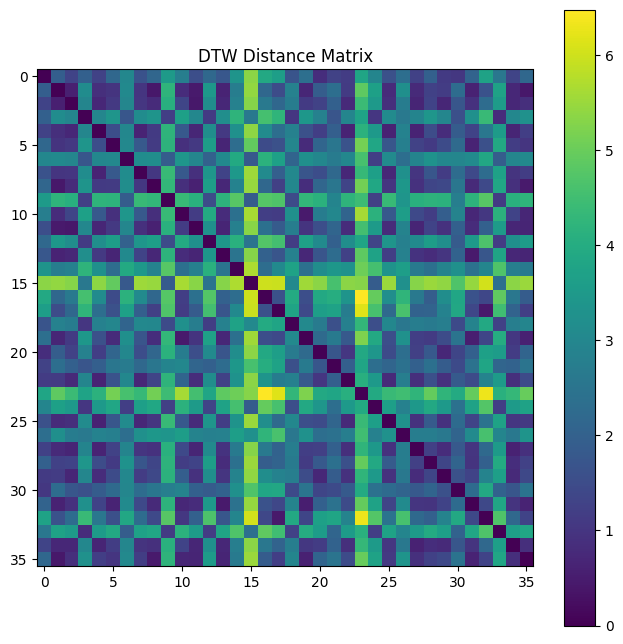

In [52]:
# DTWの距離行列を計算
distance_matrix = cdist_dtw(X_train)

# ヒートマップのプロット
plt.figure(figsize=(8, 8))
plt.imshow(distance_matrix, cmap='viridis', interpolation='nearest')
plt.title("DTW Distance Matrix")
plt.colorbar()
plt.show()

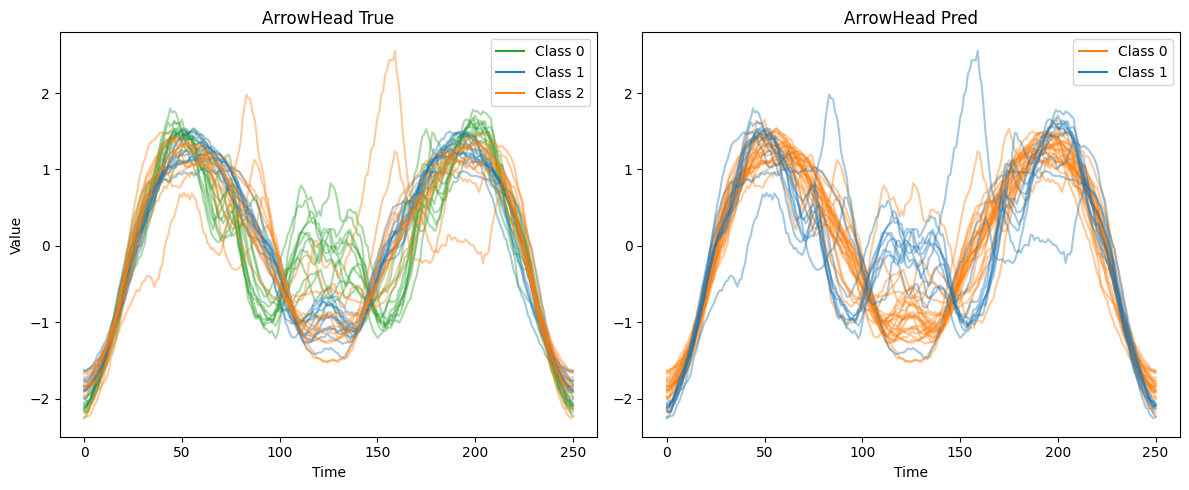

In [79]:
from sklearn.cluster import AffinityPropagation, MeanShift, AgglomerativeClustering, DBSCAN, HDBSCAN, OPTICS, Birch
from sklearn.mixture import GaussianMixture

clustering = AffinityPropagation(random_state=5, affinity='precomputed').fit(distance_matrix)

plot_result(X_train, y_train, clustering.labels_, f'{data_name}')

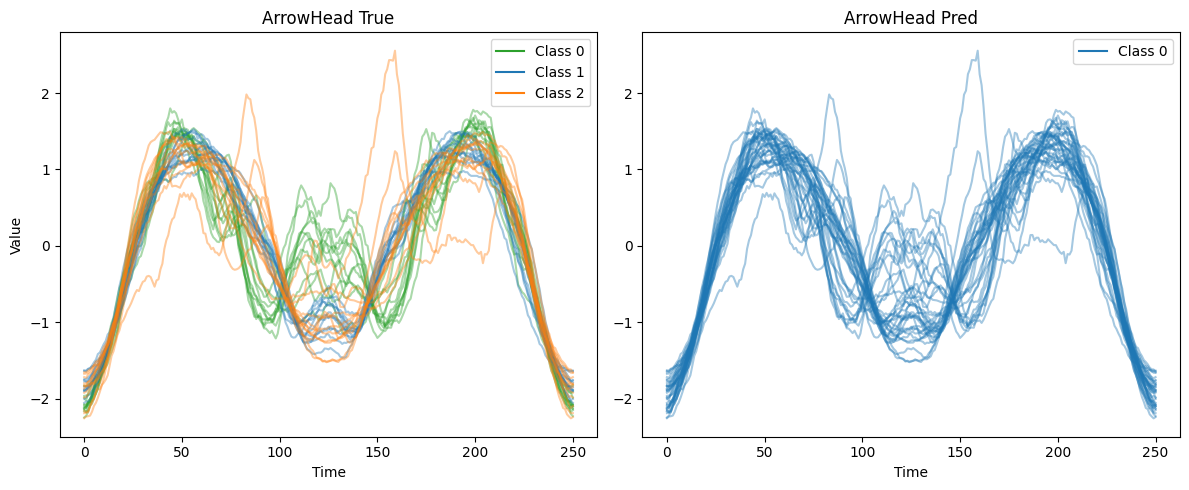

In [54]:
clustering = AffinityPropagation(random_state=5, 
                                damping=0.9,
                                affinity='precomputed').fit(distance_matrix)

plot_result(X_train, y_train, clustering.labels_, f'{data_name}')

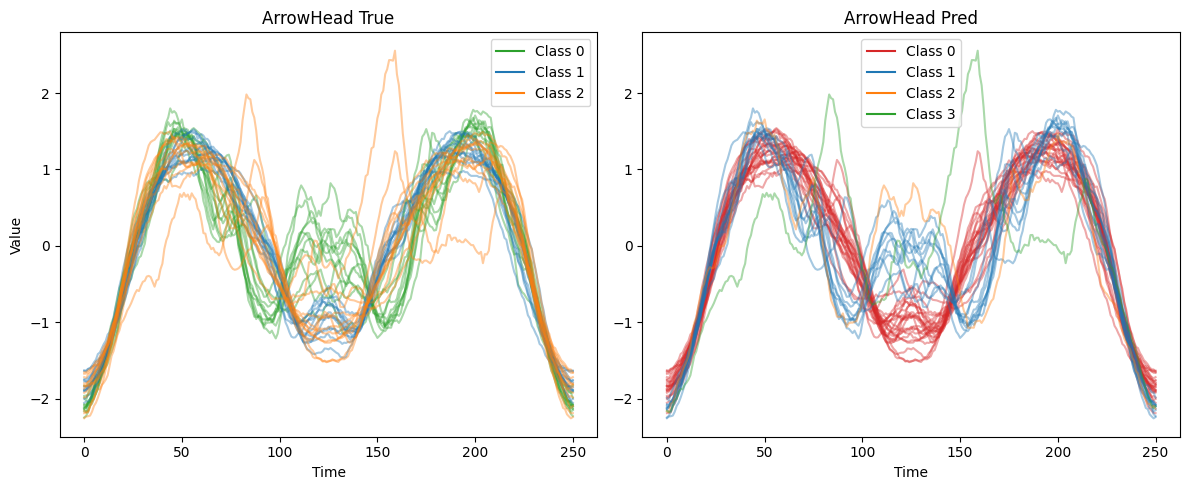

In [55]:
clustering = MeanShift().fit(distance_matrix)

plot_result(X_train, y_train, clustering.labels_, f'{data_name}')

/Users/tomokazu/miniforge3/envs/py310/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


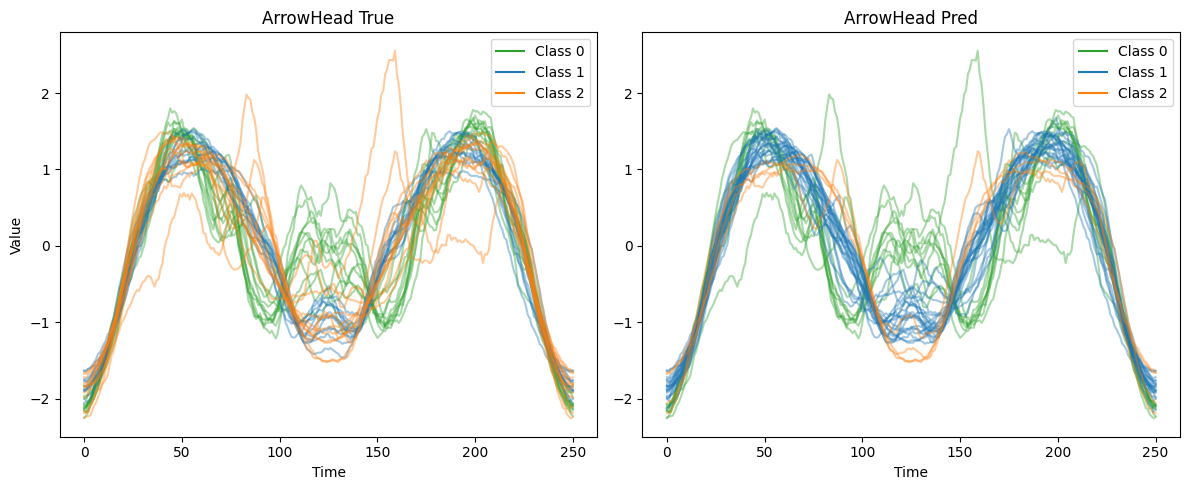

In [57]:
clustering = AgglomerativeClustering(
    n_clusters=3,
    metric='euclidean',
).fit(distance_matrix)

plot_result(X_train, y_train, clustering.labels_, f'{data_name}')

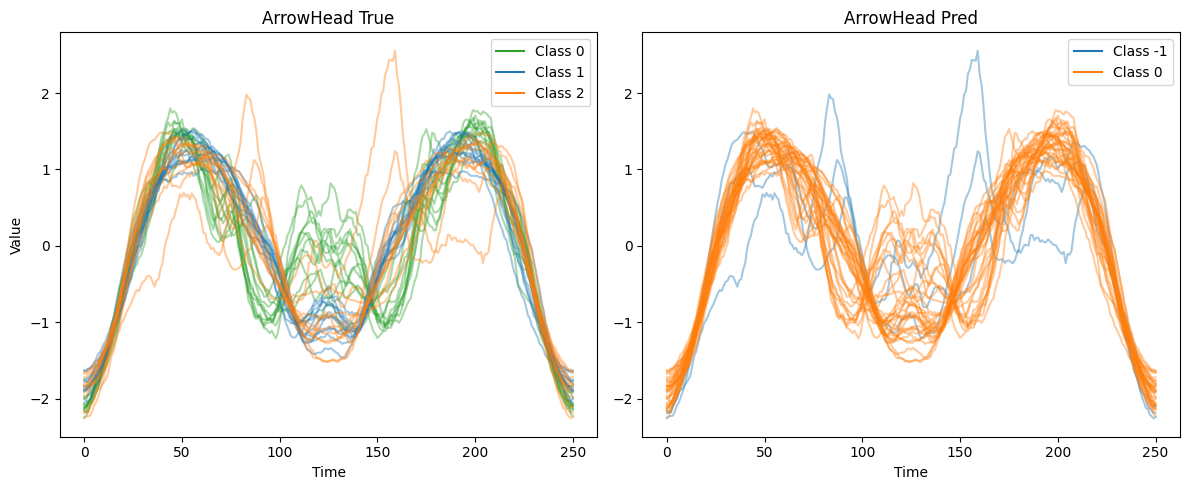

In [64]:
clustering = DBSCAN(
    eps=2, # neighborhoodと判定する距離の上限
    metric='precomputed',
).fit(distance_matrix)

plot_result(X_train, y_train, clustering.labels_, f'{data_name}')

DBSCANは、近接データと判定する距離の上限をハイパラとして設定が必要となるので使い勝手悪そう

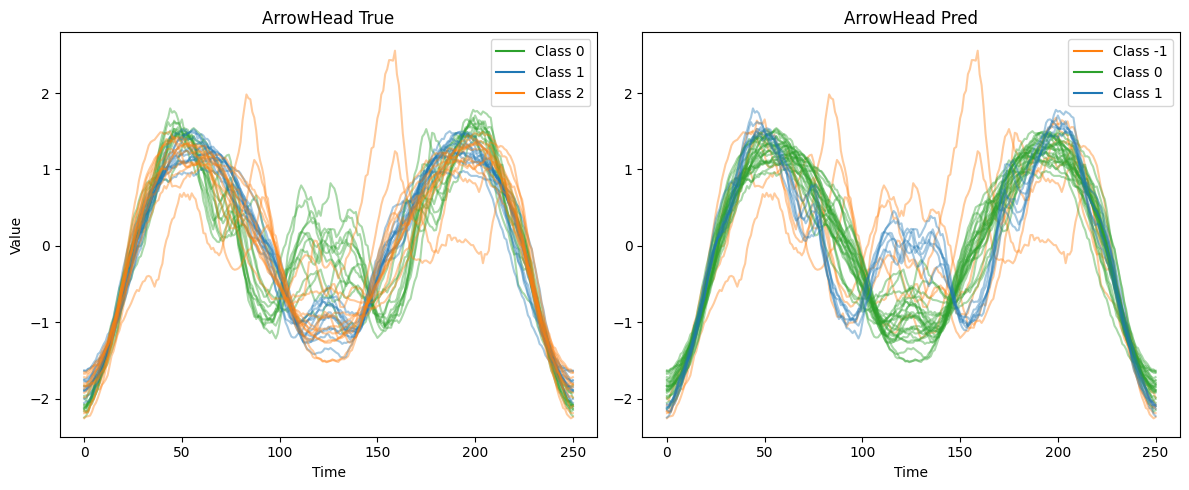

In [72]:
clustering = HDBSCAN(
    metric='precomputed',
).fit(distance_matrix)

plot_result(X_train, y_train, clustering.labels_, f'{data_name}')

In [73]:
clustering.labels_

array([ 0,  0,  0,  1,  0,  0, -1,  0,  0,  1,  0,  0,  1,  0, -1, -1,  0,
        0,  1,  0,  0, -1,  0, -1,  1,  0, -1,  0,  0,  0,  0,  0,  0,  1,
        0,  0])

DBSCANより使い勝手良さそう。ラベルが-1のデータは、クラス所属が判定できなかったデータという理解になる？min_xluster_sizeでクラス内の最小データ数を設定できるから、それに満たなかったデータっぽい。

これって結構使えそう

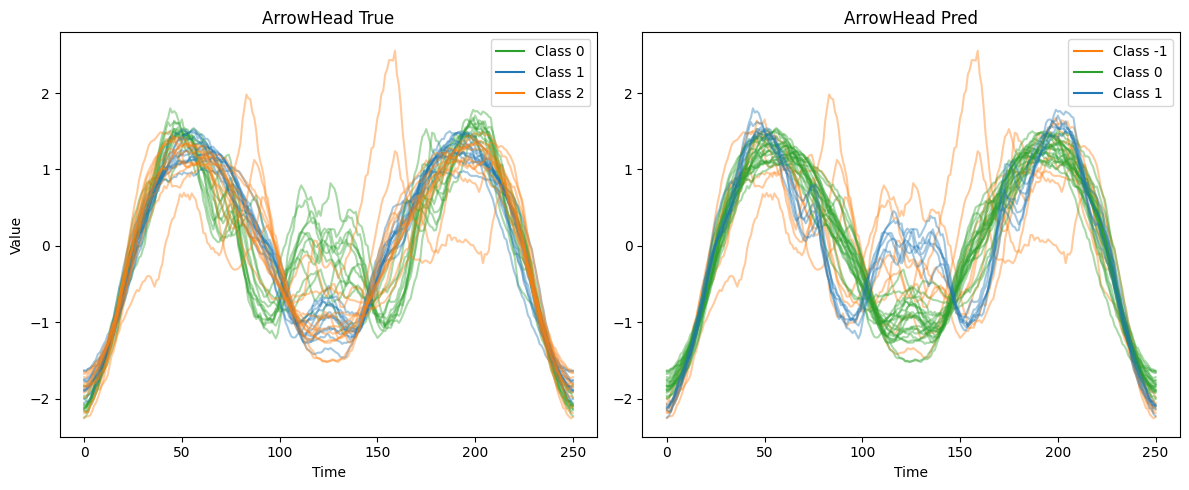

In [74]:
clustering = OPTICS(
    metric='precomputed',
).fit(distance_matrix)

plot_result(X_train, y_train, clustering.labels_, f'{data_name}')

In [75]:
clustering.labels_

array([ 0,  0,  0,  1,  0,  0, -1,  0,  0,  1,  0,  0,  1,  0, -1, -1, -1,
        0,  1,  0,  0, -1,  0, -1,  1,  0, -1,  0,  0,  0, -1,  0,  0,  1,
        0,  0])

HDBSCANに似た挙動

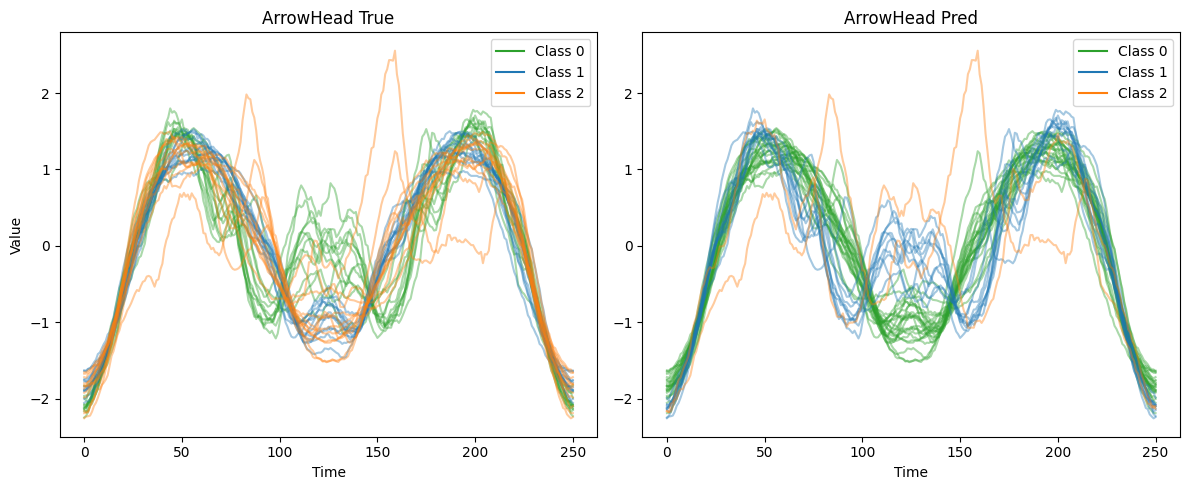

In [78]:
clustering = GaussianMixture(
    n_components=3,
    random_state=0,
).fit(distance_matrix)

plot_result(X_train, y_train, clustering.predict(distance_matrix), f'{data_name}')

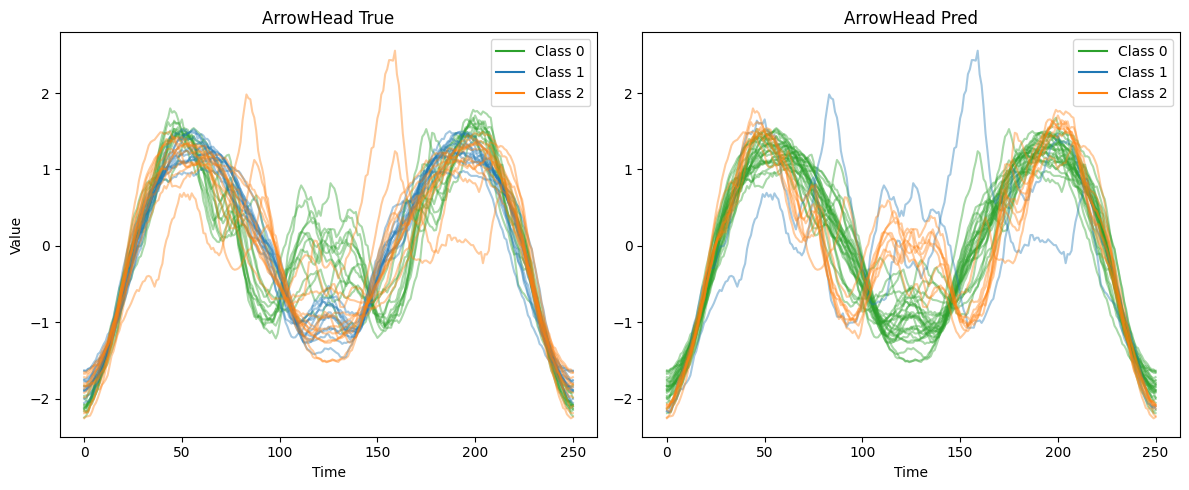

In [80]:
clustering = Birch(
    n_clusters=3,
).fit(distance_matrix)

plot_result(X_train, y_train, clustering.labels_, f'{data_name}')